# EDA On Haberman dataset (cancer Survival)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust

In [19]:
df = pd.read_csv("C:\\Users\\91863\\Desktop\\ML\\data\\haberman.csv",
                names=['Age','Operation_yr','Axillary_nodes', 'Survival_status'])
df.head()

,Age,Operation_yr,Axillary_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [20]:
df.shape

(306, 4)

Relevant Information about the Data set (https://www.kaggle.com/gilsousa/habermans-survival-data-set): The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances : 306
Number of Attributes : 4(including class attribute)
Attribute Information

1. Age of the patient at the time of operation(numerical).
2. Patient's year of operation (year-1900, numerical).
3. Number of positive Axillary nodes detected(numerical).
4. Survival_status (class attribute) 1=The patient survived 5 years and 2 = the patient died within 5 year.

In [21]:
df.info()
# There is ni missing values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_yr     306 non-null    int64
 2   Axillary_nodes   306 non-null    int64
 3   Survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [22]:
# Class label 
print(df.Survival_status.unique())

[1 2]


In [23]:
#Let's modify the dependant variable(target column) to be categorical
df.Survival_status = df.Survival_status.map({1:'yes', 2:'no'}).astype('category')
df.head()

,Age,Operation_yr,Axillary_nodes,Survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [24]:
print(df.columns)

Index(['Age', 'Operation_yr', 'Axillary_nodes', 'Survival_status'], dtype='object')


In [25]:
df.describe()

,Age,Operation_yr,Axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [26]:
print("Haberman data set structure:")
print("Number of data points : ",df.shape[0])
print("Number of features: ", df.shape[1])
print()
print(df.Survival_status.value_counts(normalize = True))

Haberman data set structure:
Number of data points :  306
Number of features:  4

yes    0.735294
no     0.264706
Name: Survival_status, dtype: float64


### Some Observation
1. The age of the patient vary from 30 to 83 with the median of 50.

2. The number of detected nodes vary from 0 to 52(probably an outlier) with the median of 1 and mean of 4.

3. 75% of data points have less than 5 detected axillary nodes and 25% have no detected nodes.

4. The target column is unbalanced with 74%-yes, 26%-no.

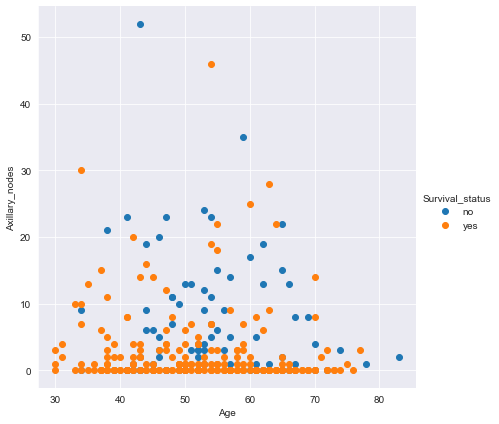

In [27]:
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='Survival_status', height=6).map(plt.scatter, 'Age',
                                                    'Axillary_nodes').add_legend()
plt.show()

Some observation: As the number of positive axillary nodes detected increases, there are more people who die within 5 years than people who survived. On the opposite we notice that people who survived genrally had few axillary detected nodes.

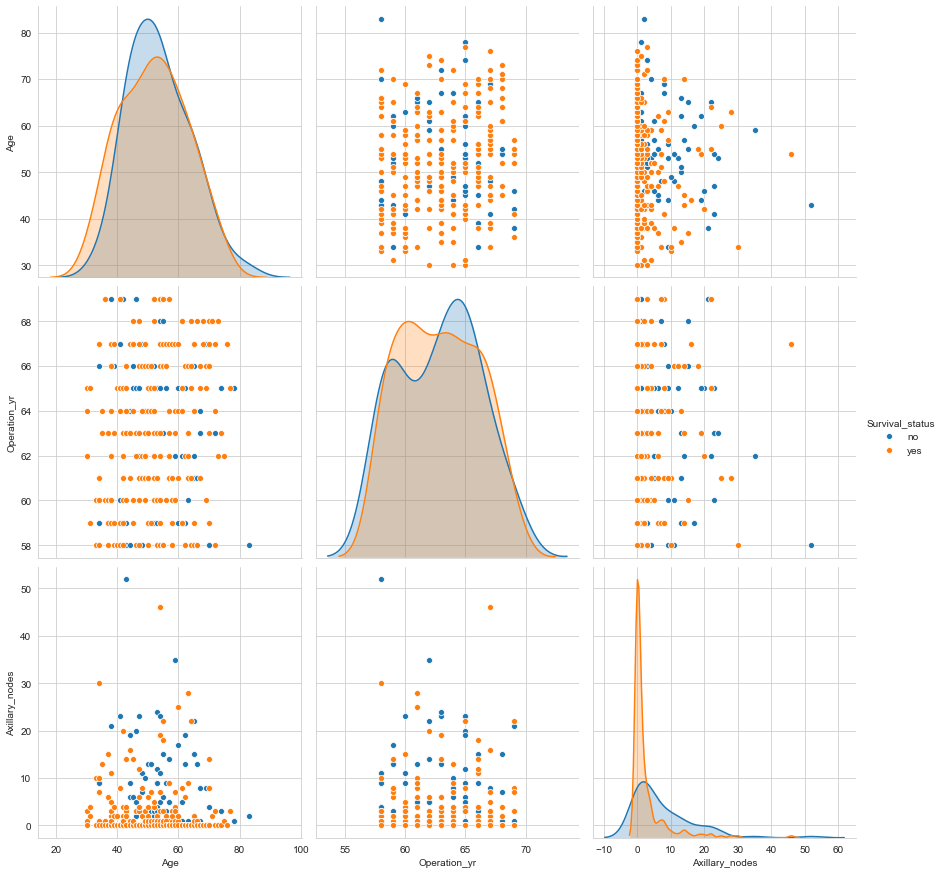

In [28]:
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'Survival_status', height=4)
plt.show()

1. The number of detected axillary nodes are the most useful features to identify our target variable value.

2. There is a lot of overlap between the two classes which can't be seprated.

In [29]:
#Let's split our dataframe into two dataframe
yes_df = df[df.Survival_status == 'yes']
no_df = df[df.Survival_status == 'no']

## Univariate analysis using histogram, PDF and CDF

### Univariate analysis on dataframes seprateb by class label

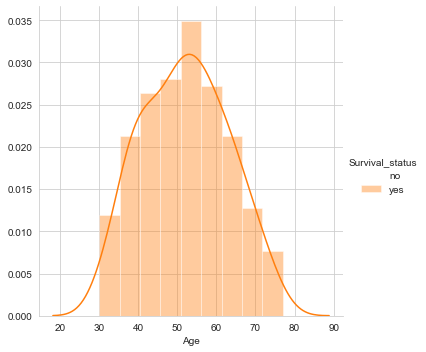

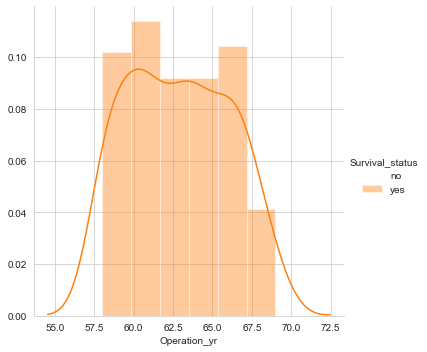

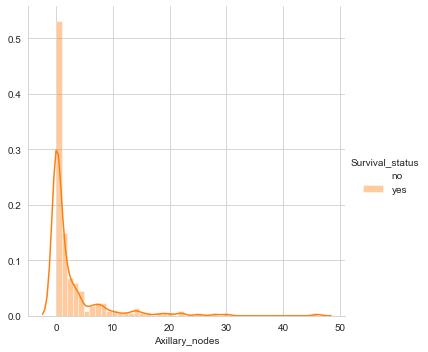

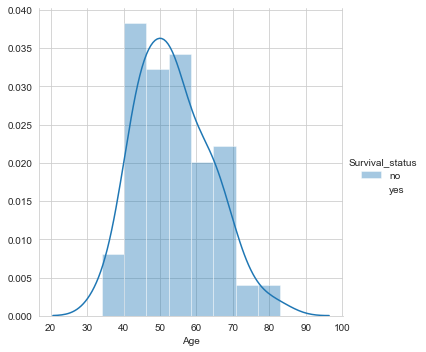

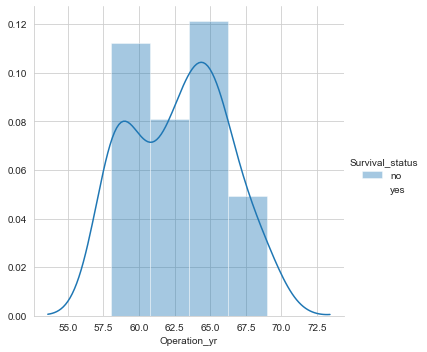

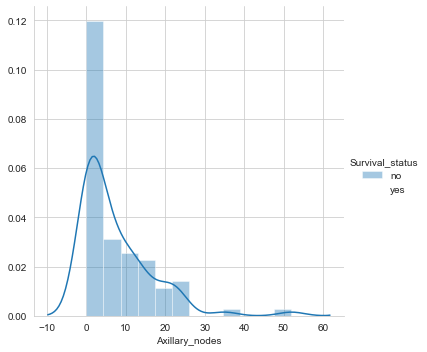

In [30]:
for df1 in [yes_df, no_df]:
    for col in df.columns[0:-1]:
        sns.FacetGrid(df1, hue='Survival_status',height=5).map(sns.distplot,
                                                             col).add_legend()
        plt.show()

### Univariate analysis on whole dataset

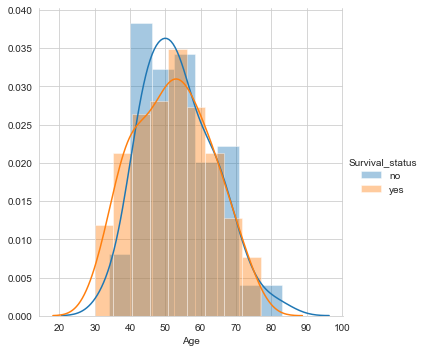

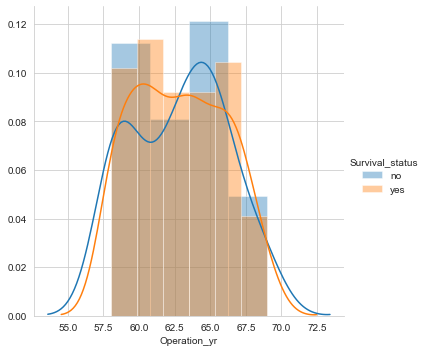

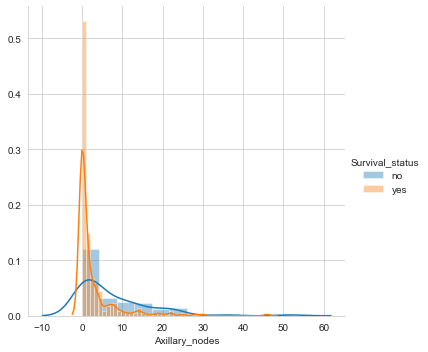

In [31]:
for col in df.columns[0:-1]:
    sns.FacetGrid(df, hue='Survival_status', height=5).map(sns.distplot,
                                                           col).add_legend()
    plt.show()

PDF and CDF of  Age variable.
PDF:  [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
Bins Edges:  [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


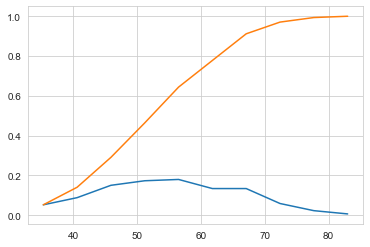

PDF and CDF of  Operation_yr variable.
PDF:  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
Bins Edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


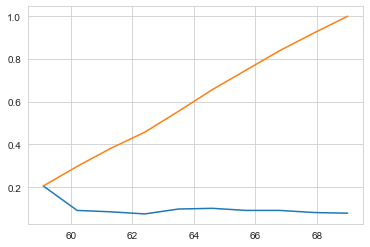

PDF and CDF of  Axillary_nodes variable.
PDF:  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
Bins Edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


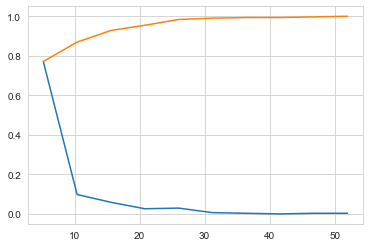

In [32]:
for col in df.columns[0:-1]:
    counts, bins_edges = np.histogram(df[col], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    print("PDF and CDF of ",col,"variable.")
    print("PDF: ",pdf)
    print('Bins Edges: ',bins_edges)
    plt.plot(bins_edges[1:],pdf)
    plt.plot(bins_edges[1:],cdf)
    plt.show()

### Univariate PDFs and CDFs on class label datasets


PDF and CDF  Age variable in the dataframe: yes_DF
PDF:  [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bins_Edges :  [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


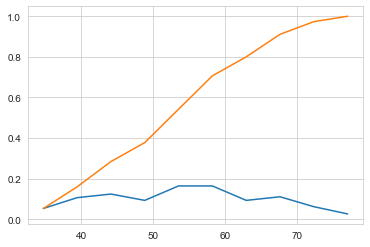

PDF and CDF  Operation_yr variable in the dataframe: yes_DF
PDF:  [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bins_Edges :  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


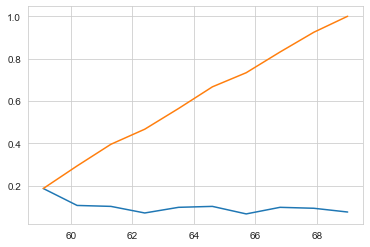

PDF and CDF  Axillary_nodes variable in the dataframe: yes_DF
PDF:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bins_Edges :  [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


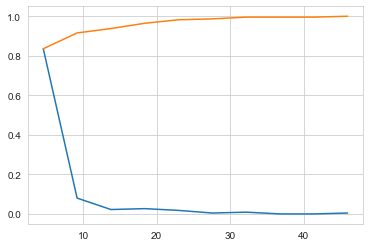

PDF and CDF  Age variable in the dataframe: no_DF
PDF:  [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bins_Edges :  [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


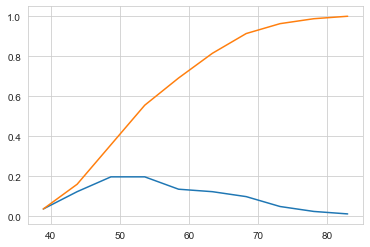

PDF and CDF  Operation_yr variable in the dataframe: no_DF
PDF:  [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Bins_Edges :  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


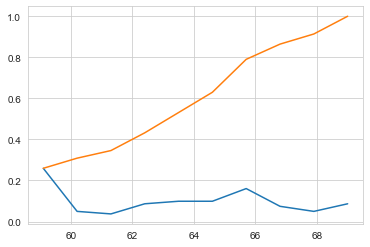

PDF and CDF  Axillary_nodes variable in the dataframe: no_DF
PDF:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bins_Edges :  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


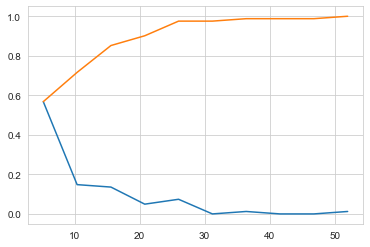

In [35]:
for df1 in [yes_df, no_df]:
    for col in df.columns[0:-1]:
        counts, bins_edges = np.histogram(df1[col])
        pdf = counts/sum(counts)
        cdf = np.cumsum(pdf)
        print("PDF and CDF ",col,"variable in the dataframe:", 
              str(df1.Survival_status.iloc[0])+"_DF")
        print("PDF: ",pdf)
        print("Bins_Edges : ",bins_edges)
        plt.plot(bins_edges[1:], pdf)
        plt.plot(bins_edges[1:],cdf)
        plt.show()

### some statistics

In [48]:
for col in ['Age', 'Axillary_nodes']:
    print()
    print("*"*50)
    print(col, "variable: ")
    print("Mean")
    print(np.mean(df[col]))
    print("\nstd_dev:")
    print(np.std(df[col]))
    print("\nMedian")
    print(np.median(df[col]))
    print("\nQuantiles")
    print(np.percentile(df[col], np.arange(0, 100, 25)))
    print("\n90th Percentile")
    print(np.percentile(df[col], 90))
    print("\nMedian Asolute Deviation")
    print(robust.mad(df[col]))


**************************************************
Age variable: 
Mean
52.45751633986928

std_dev:
10.785785203631832

Median
52.0

Quantiles
[30.   44.   52.   60.75]

90th Percentile
67.0

Median Asolute Deviation
11.860817748044816

**************************************************
Axillary_nodes variable: 
Mean
4.026143790849673

std_dev:
7.177896092811143

Median
1.0

Quantiles
[0. 0. 1. 4.]

90th Percentile
13.0

Median Asolute Deviation
1.482602218505602


## Box Plot

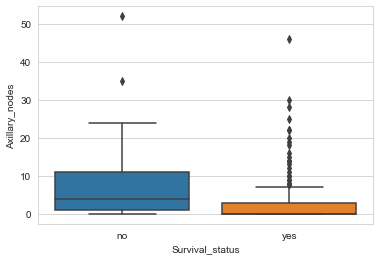

In [51]:
sns.boxplot(x='Survival_status',y='Axillary_nodes',data=df)
plt.show()

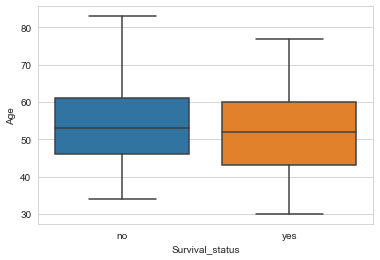

In [52]:
sns.boxplot(x='Survival_status',y='Age', data=df)
plt.show()

### Violin Plots

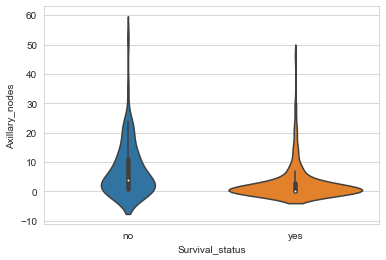

In [53]:
sns.violinplot(x="Survival_status", y="Axillary_nodes", data = df, height=6)
plt.show()

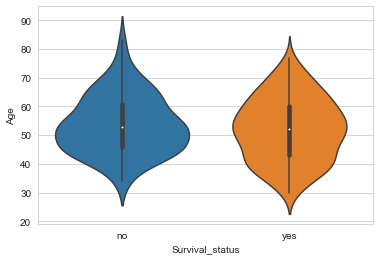

In [54]:
sns.violinplot(x='Survival_status', y='Age', data=df, height = 6)
plt.show()

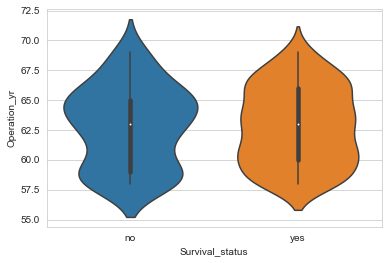

In [55]:
sns.violinplot(x='Survival_status', y='Operation_yr', data = df, height=6)
plt.show()

### Multivariate Count Probability density

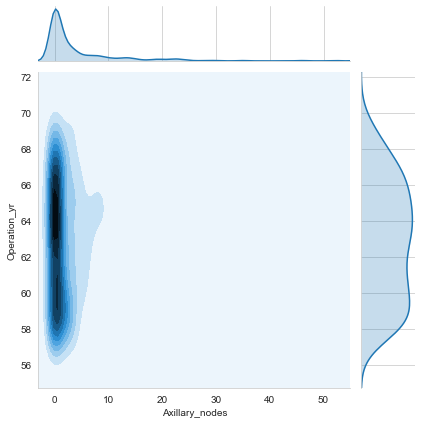

In [57]:
sns.jointplot(x='Axillary_nodes',y='Operation_yr', data = df, kind='kde')
plt.show()

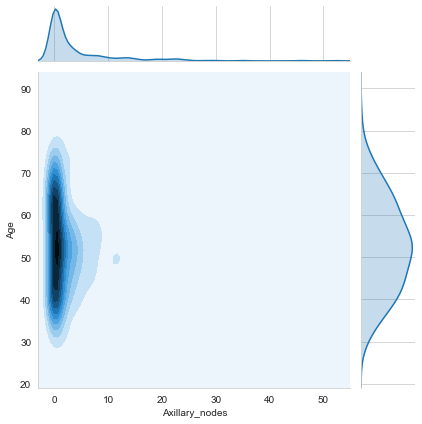

In [58]:
sns.jointplot(x='Axillary_nodes', y='Age', data = df, kind='kde')
plt.show()

### Observation and conclusion

1.The variable 'number of detected nodes' is the best one to help us seprate and diffentiate the two classes.

2.Except for the year 65(+- 1 year), the chances of surviving are greater than before 1960.

3.People who survived had their ages mainly between 45 to 55 years old.